# QuTiP Example: Parallel Steady State Jaynes-Cummings Calculation

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

## System Setup

In [5]:
kappa = 2
gamma = 0.2
g = 1
wc = 0
w0 = 0
N = 5
E = 0.5
nloop = 101
wlist = np.linspace(-5, 5, nloop)

## Define Function to Run in Parallel

In [6]:
def probss(wl, E, kappa, gamma, g, wc, w0, N):
    # construct composite operators
    ida = qeye(N)
    idatom = qeye(2)
    a = tensor(destroy(N), idatom)
    sm = tensor(ida, sigmam())
    
    # Hamiltonian
    H = (w0 - wl) * sm.dag() * sm + (wc - wl) * a.dag() * a + \
        1j * g * (a.dag() * sm - sm.dag() * a) + E * (a.dag() + a)

    # Collapse operators
    C1 = np.sqrt(2 * kappa) * a
    C2 = np.sqrt(gamma) * sm
    C1dC1 = C1.dag() * C1
    C2dC2 = C2.dag() * C2

    # find steady state
    rhoss = steadystate(H, [C1, C2])

    # calculate expectation values
    count1 = expect(C1dC1, rhoss)
    count2 = expect(C2dC2, rhoss)
    infield = expect(a, rhoss)
    return count1, count2, infield

## Run Simulation

In [7]:
count1, count2, infield = parfor(probss, wlist, E=E, kappa=kappa, gamma=gamma, g=g, wc=wc, w0=w0, N=N)

## Plot Results

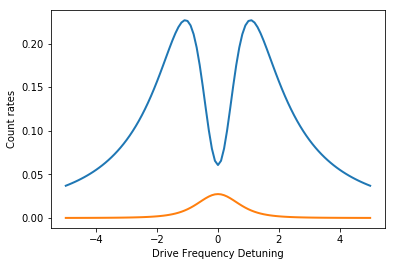

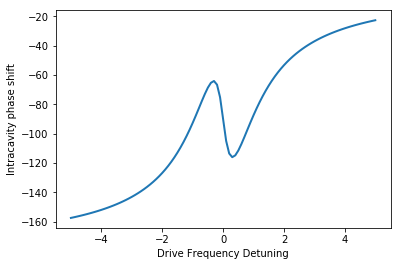

In [8]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(wlist, count1, wlist, count2, lw=2)
ax.set_xlabel('Drive Frequency Detuning')
ax.set_ylabel('Count rates')

# plot phase shift of cavity light
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.plot(wlist, 180.0 * np.angle(infield) / np.pi, lw=2)
ax2.set_xlabel('Drive Frequency Detuning')
ax2.set_ylabel('Intracavity phase shift');

In [9]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
